In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import modules
import sys
sys.path.append('../modules')
import model
import utils

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#118ab2", "#e76f51", "#2a9d8f", '#e63946', '#7b2cbf', '#2b2d42', '#ff8fab', '#6c757d', '#fdc500', '#5bc0be']) 

In [3]:
N = 200
Nsteps = 100000
dt = 0.01

Time = np.arange(Nsteps)*dt

x0 = np.ones(N)*2.5
y0 = np.ones(N)*2.5

x0rand = np.random.randn(N)
y0rand = np.random.randn(N)

epsilon = 0.3

mu = 1
muHat = 1
delta = -1/3
muI = 0.6
alpha = 0.1
beta = 0.8
gamma = 0.7
sigma = 0.1

model_kwargs = {'mu': mu, 'muHat': muHat, 'delta': delta,
                'muI': muI, 'alpha': alpha, 'beta': beta,
                'gamma': gamma, 'sigma': sigma}

# Quenched currents

In [4]:
x_QS, y_QS = model.simulate_quenched_Fitzugh_Nagumo(N, Nsteps, dt, x0, y0, epsilon = epsilon, **model_kwargs)

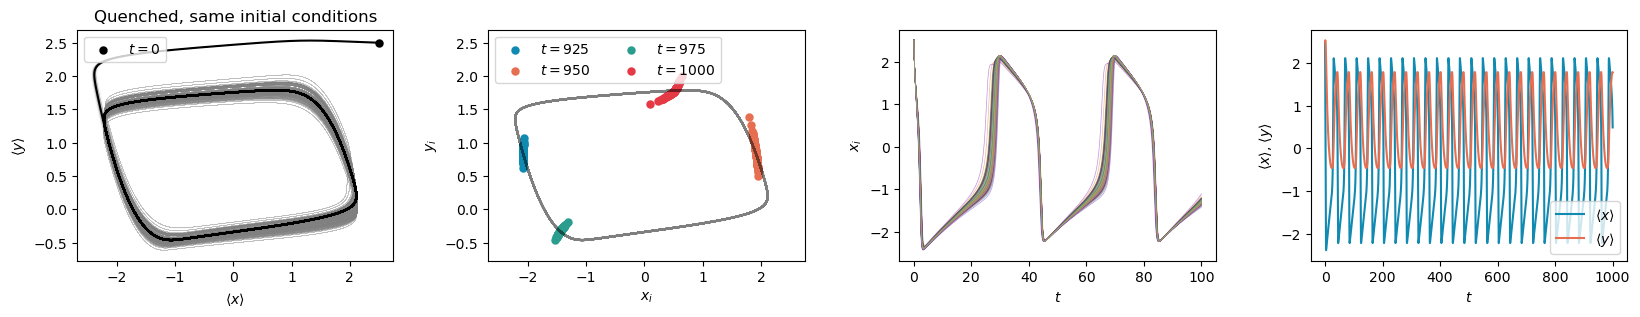

In [5]:
fig, ax = utils.plot_results(x_QS, y_QS, Time, title = 'Quenched, same initial conditions')
plt.savefig('../plots/quenched_same_initial_conditions.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [6]:
x_QR, y_QR = model.simulate_quenched_Fitzugh_Nagumo(N, Nsteps, dt, x0rand, y0rand, epsilon = epsilon, **model_kwargs)

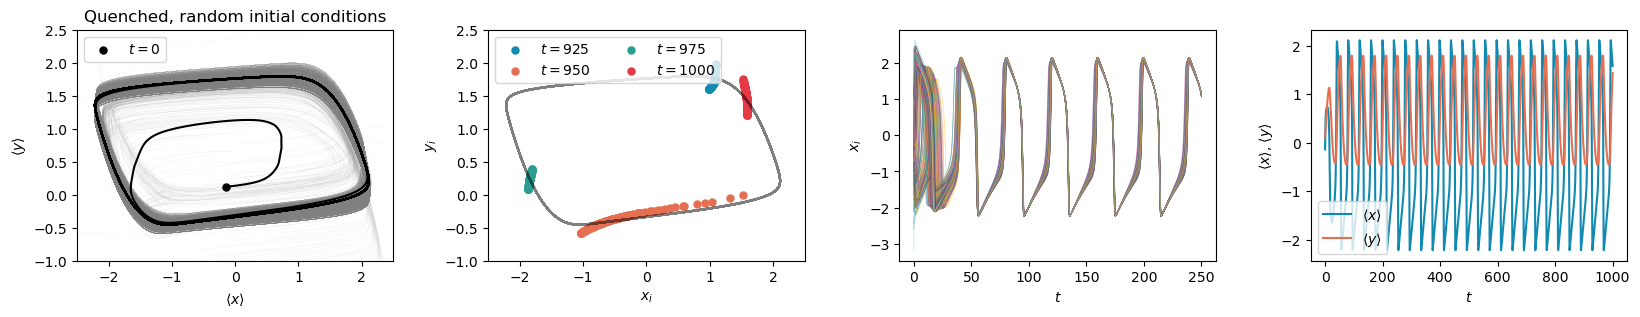

In [8]:
fig, axs = utils.plot_results(x_QR, y_QR, Time, title = 'Quenched, random initial conditions', steps_to_plot=25000, Nosc_to_plot=1000)
axs[0].set_xlim(-2.5, 2.5)
axs[0].set_ylim(-1, 2.5)

axs[1].set_xlim(-2.5, 2.5)
axs[1].set_ylim(-1, 2.5)

plt.savefig('../plots/quenched_random_initial_conditions.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Brownian noise

In [9]:
x_BS, y_BS = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0, y0, epsilon = epsilon)

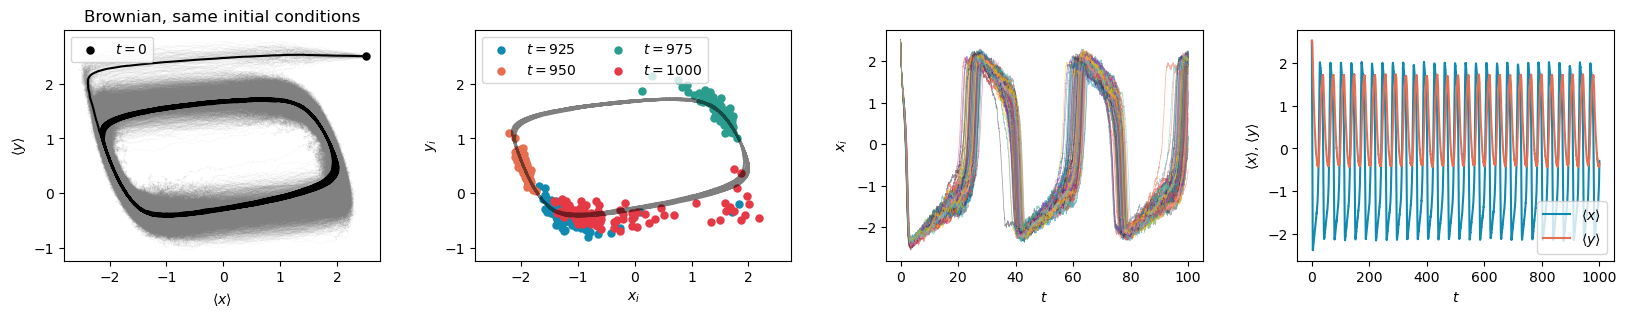

In [10]:
fig, ax = utils.plot_results(x_BS, y_BS, Time, title = 'Brownian, same initial conditions')
plt.savefig('../plots/brownian_same_initial_conditions.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [11]:
x_BR, y_BR = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0rand, y0rand, epsilon = epsilon)

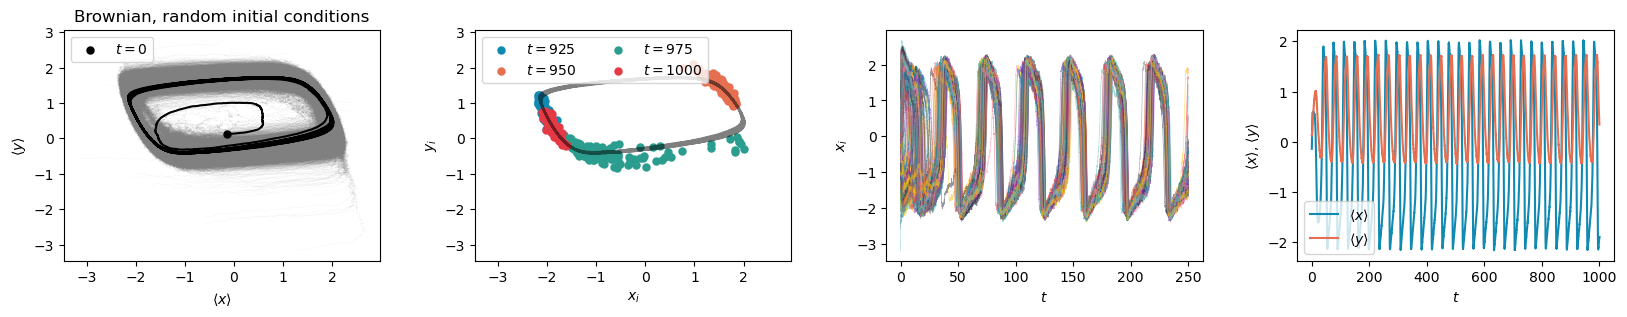

In [12]:
fig, ax = utils.plot_results(x_BR, y_BR, Time, title = 'Brownian, random initial conditions', steps_to_plot=25000, Nosc_to_plot=1000)
plt.savefig('../plots/brownian_random_initial_conditions.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# Modified model with mean correction

In [17]:
x_BS_Mod_NOPulse, y_BS_Mod_NOPulse = model.simulate_pulse_Fitzugh_Nagumo(N, Nsteps, dt, x0, y0, theta = 0.4)

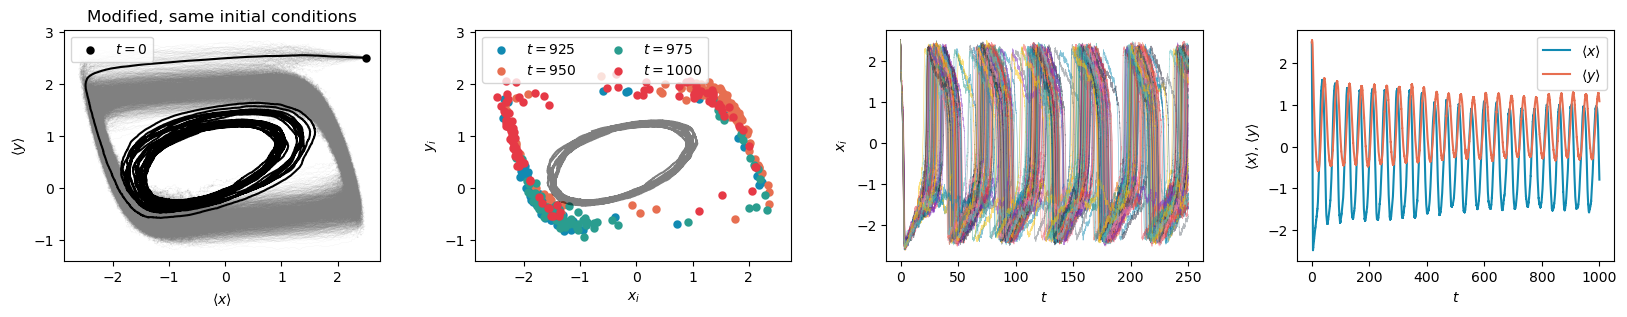

In [18]:
utils.plot_results(x_BS_Mod_NOPulse, y_BS_Mod_NOPulse, Time, title = 'Modified, same initial conditions', steps_to_plot=25000)
plt.show()

In [19]:
x_BS_Mod_Pulse, y_BS_Mod_Pulse = model.simulate_pulse_Fitzugh_Nagumo(N, Nsteps, dt, x0, y0, theta = 0.4, pulse_val=5, pulse_start=15000, pulse_end=16000)

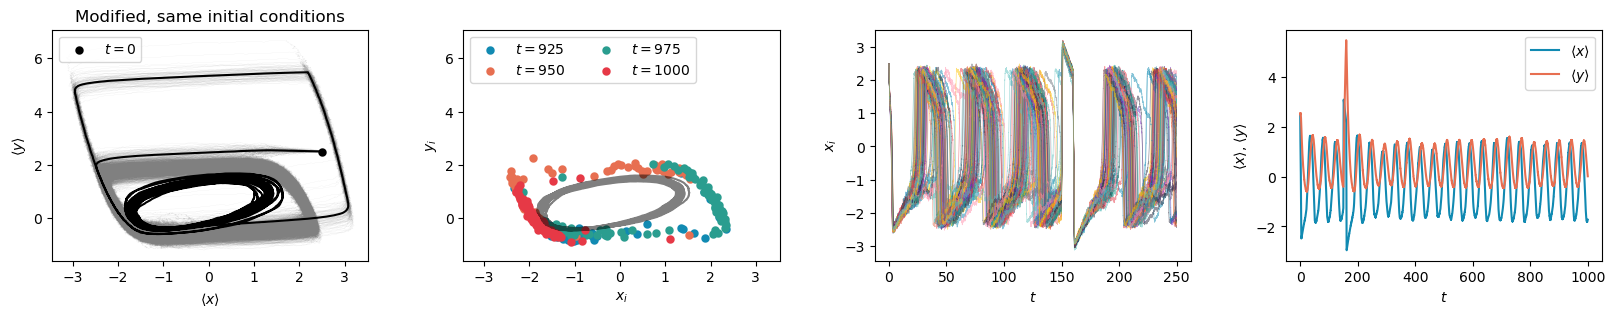

In [20]:
utils.plot_results(x_BS_Mod_Pulse, y_BS_Mod_Pulse, Time, title = 'Modified, same initial conditions', steps_to_plot=25000)
plt.show()

# Modified repulsive model

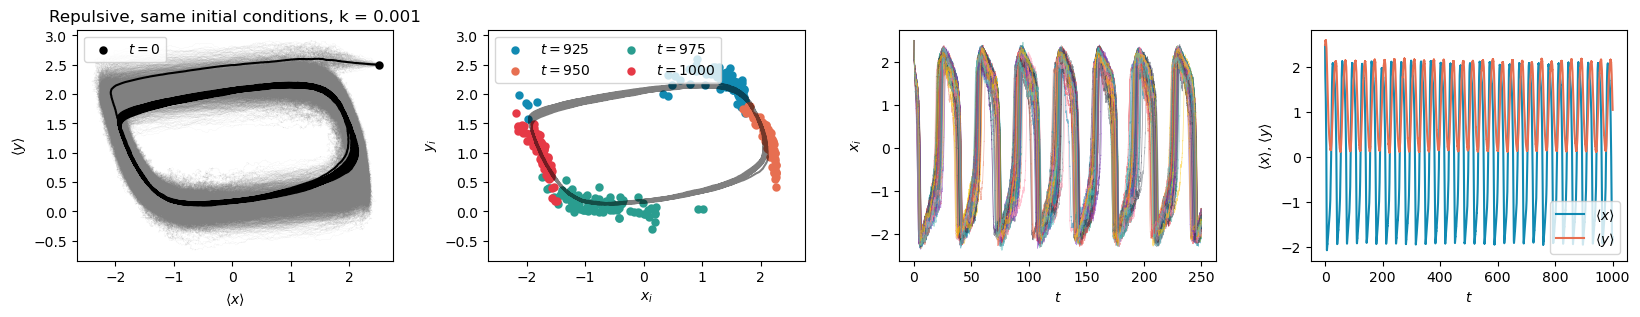

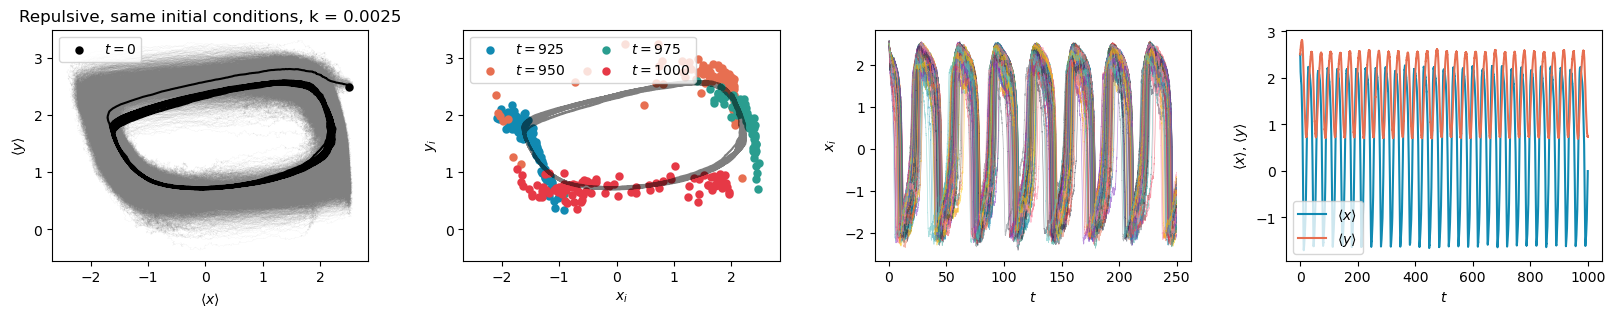

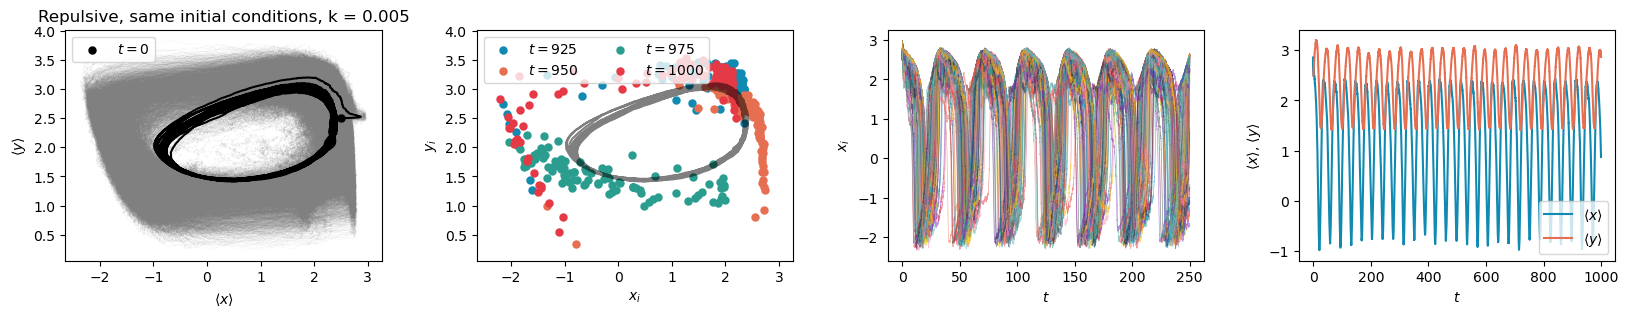

In [21]:
for k in [0.001, 0.0025, 0.005]:
    x_BS_Rep, y_BS_Rep = model.simulate_repulsive_Fitzugh_Nagumo(N, Nsteps, dt, x0, y0, k = k, epsilon = epsilon, **model_kwargs)
    utils.plot_results(x_BS_Rep, y_BS_Rep, Time, title = f'Repulsive, same initial conditions, k = {k}', steps_to_plot=25000)
    plt.show()